# Data Scientist Nanodegree Project One

The goal of project number one is to analyze the AirBnb Seattle Dataset, and apply everything learned in the section. This dataset contains three csv files: __Listings , Calendar and Reviews__.  First, we import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm_notebook as tqdm
pd.set_option('display.float_format', '{:.2f}'.format)

## CRISP-DM : Business Understanding

__Airbnb__ is a world wide known service which, by providing a mobile app, you´re able to rent or publish different locations. People are able to choose from a wide variety of places to stay just by using there phone. Airbnb allows you to rent anytime of place going from hotels to tree houses.  

Taking a look at the business model, we can identify that the way that Airbnb obtains profits it´s through charging fees to both the customer and the host. Clearly, customers pay a higher fee than the hosts. Both customers and hosts need to provide certain information to be validated and ensure they are trustable people. Therefore, as every business the main target is maximizing profits. 

As mentioned in the CRISP-DM, we should ask ourselves different questions that we would like to answer using the available data. For this project I chose the following:

1. How was the occupation rate along the last 365 days? Useful for understanding if booking have increased, decreased or stayed the same
2. Which are the top properties that are been booked? This is useful to make a customer segmentation and understand the preferences of each user
3. Has there been a significant increase on the price of listings?

![title](businessmodel.jpg)

## CRISP-DM : Data Understanding

In [2]:
calendar = pd.read_csv("Datasets/calendar.csv")
listings = pd.read_csv("Datasets/listings.csv")
reviews = pd.read_csv("Datasets/reviews.csv")

### Data Understanding : Calendars

In [3]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
print(calendar.isna().sum())
print("=======")
calendar.dropna().groupby("available").size()

listing_id         0
date               0
available          0
price         459028
dtype: int64


available
t    934542
dtype: int64

In [5]:
print(calendar.info())
calendar.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None


,listing_id
count,1393570.00
mean,5550111.42
std,2962273.53
min,3335.00
25%,3258213.00
50%,6118244.50
75%,8035212.00
max,10340165.00


The __Calendar__ set, indicates the availability of each listing across different dates and also the price of the respective listing. We can see that the __price__ column has a total of __459028__ missing prices. However, by doing a little groupby and dropna in the dataframe, we see that for each listing that isn´t available, there is NaN value for the price. We can also appreciate a huge difference between the minimum (3335) and maximum (10340165) prices.

In [6]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['year'] = [x.year for x in calendar['date']]
calendar['month'] = [x.month for x in calendar['date']]
calendar['day'] = [x.day for x in calendar['date']]

<AxesSubplot:xlabel='month', ylabel='count'>

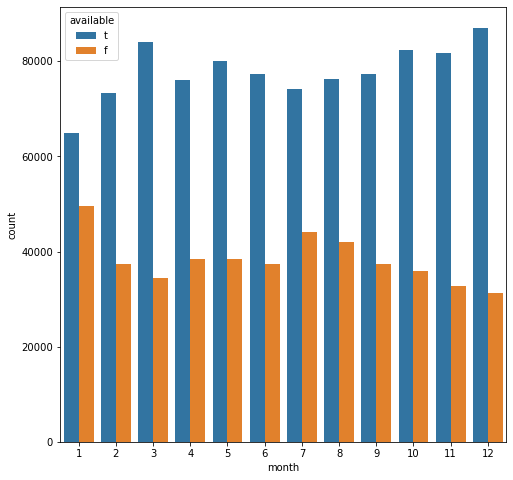

In [7]:
plt.figure(figsize = (8 , 8))
sns.countplot(x = "month" , hue = "available" , data = calendar)

In [8]:
calendar.tail(10)

,listing_id,date,available,price,year,month,day
1393560,10208623,2016-12-24,f,NaN,2016,12,24
1393561,10208623,2016-12-25,f,NaN,2016,12,25
1393562,10208623,2016-12-26,f,NaN,2016,12,26
1393563,10208623,2016-12-27,f,NaN,2016,12,27
1393564,10208623,2016-12-28,f,NaN,2016,12,28
1393565,10208623,2016-12-29,f,NaN,2016,12,29
1393566,10208623,2016-12-30,f,NaN,2016,12,30
1393567,10208623,2016-12-31,f,NaN,2016,12,31
1393568,10208623,2017-01-01,f,NaN,2017,1,1
1393569,10208623,2017-01-02,f,NaN,2017,1,2


By transforming the date columns to datetime, we are able to plot the data monthly. We can see that the monthly proportion of non-available and available listings is more or less evenly distributed across months. The same plot was made for the year, however almost all of the data belonged to 2016. We also see that overall, the rented listings are half of the available ones.

### Data Understanding : Reviews

In [9]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [10]:
print(reviews.groupby("reviewer_id").size().sort_values(ascending = False))
print("==============================")
print(reviews.isna().sum())

reviewer_id
206203      67
15121499    32
2734499     19
5775807     19
29590276    18
            ..
8573224      1
8573515      1
8573795      1
8574337      1
52812740     1
Length: 75730, dtype: int64
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64


In [11]:
reviews[reviews['reviewer_id'] == 206203 ]

,listing_id,id,date,reviewer_id,reviewer_name,comments
2981,741699,6902331,2013-08-29,206203,Amanda,I stayed at the Seward Park Zen Retreat as a b...
3006,741699,10781810,2014-03-07,206203,Amanda,Matt's place is a wonderful retreat in an ecle...
3015,741699,11925465,2014-04-19,206203,Amanda,Matt is a friendly host and the Seward Park Ze...
3018,741699,12408205,2014-05-01,206203,Amanda,"The Zen Retreat is quiet, in a great neighborh..."
3063,741699,22453515,2014-11-07,206203,Amanda,The Zen Retreat is a great place to relax and ...
...,...,...,...,...,...,...
74904,10385,89229,2010-09-02,206203,Amanda,Nice accomodations. Great bed! Very nice peo...
76980,2472850,15533376,2014-07-11,206203,Amanda,Teagen is a responsive accommodating host and ...
77987,3293438,34725389,2015-06-11,206203,Amanda,"This is a great place, close to downtown, quie..."
79066,143704,912199,2012-02-10,206203,Amanda,"Julie's guest apartment is cute, clean, comfor..."


In [12]:
reviews.groupby("listing_id").size().sort_values(ascending = False)

listing_id
208356      474
365550      466
25002       404
47196       353
63308       320
           ... 
6292452       1
6305798       1
8080939       1
8081658       1
10248139      1
Length: 3191, dtype: int64

The __Reviews__ file has a list of evaluations for each of the different listings, which can be identified by using the __listing_id__ . There are only 18 missing values, belonging to the comments. Also, there are some "top reviewers" which are people who have done reviews for more than one listing. User __Amanda__ is the user with the most amount of reviews, a total of 67. There are also several listings with a great amount of reviews, with more than 400 reviews. 

### Data Understanding : Listings

__Listings__ contains a total of 92 columns of information belonging to each listing. After reading all of the columns, some of them such as ids or urls aren´t useful so they were removed from the study. There were also fixed values for features such as __Country , City, State , Market__ , therefore these  features weren´t considered. Given the several columns, some of them were grouped into groups for better understanding. These groups were : __ListingInfo , HostInfo__.

In [13]:
listinginfo = listings[['id' , 'name' ,
        'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed' , 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365' , 'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']]

hostinfo = listings[['id' ,'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified']]

In [14]:
listinginfo.head()

,id,name,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,4,1.00,1.00,...,9.00,10.00,f,NaN,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,4,1.00,1.00,...,10.00,10.00,f,NaN,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,Queen Anne,West Queen Anne,Queen Anne,House,Entire home/apt,11,4.50,5.00,...,10.00,10.00,f,NaN,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,3,1.00,0.00,...,NaN,NaN,f,NaN,f,flexible,f,f,1,NaN
4,278830,Charming craftsman 3 bdm house,Queen Anne,West Queen Anne,Queen Anne,House,Entire home/apt,6,2.00,3.00,...,9.00,9.00,f,NaN,f,strict,f,f,1,0.89


<AxesSubplot:xlabel='count', ylabel='property_type'>

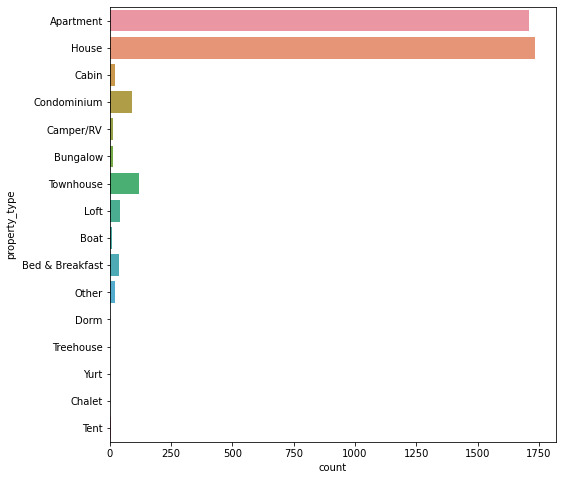

In [15]:
plt.figure(figsize = (8 , 8))
sns.countplot(y = "property_type" , data = listings)

In [16]:
listinginfo['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan],
      dtype=object)

## CRISP-DM : Data Preparation

### Data Preparation Calendars : Handling NaN Values

As mentioned before, once the listing is booked it´s price becomes NaN. Therefore, we will take the followeing approach: we will consider that the prices of the listings that are booked will be the same as the last price before they weren´t available. This means if some listing was booked on the 9th of May, then the price for that day will be the price of May 8th. However, in here we encounter two issues: the first one is if there isn´t a previous price and only a forward price. In that case, the future price will be considered as the previous price. The second issue happens when listings have always been rented. In that case we remove that listing. So first we identify those cases in which we don´t have any reference.

In [17]:
listids = calendar['listing_id'].unique()

In [18]:
nandf = []
for i in listids:
    d = {
        "listing" : i ,
        "Nanvals" : calendar[calendar['listing_id'] == i]['price'].isnull().sum()
    }
    nandf.append(d)
nandf = pd.DataFrame(nandf)

In [19]:
nandf.groupby("Nanvals").size()

Nanvals
0      678
1       91
2       44
3       51
4       53
      ... 
361      5
362      8
363     32
364      7
365     95
Length: 363, dtype: int64

We find out that a total of __95__ listings have always been rented. Since this listings represent less than 3% of the total listings, we remove them.

In [20]:
nandrop = nandf[nandf['Nanvals'] == 365]['listing'].values

In [21]:
calendar = calendar.set_index("listing_id").drop(nandrop)

In [22]:
calendar = calendar.sort_values(by = ["listing_id" , "date"])

In [23]:
calendar.reset_index(inplace = True)

Now, we proceed to fill the missing values

In [24]:
listids = calendar['listing_id'].unique()

In [25]:
### Takes a little while to load
newcalendar = calendar[calendar['listing_id'] == listids[0]].ffill().bfill()
for i in range(1,len(listids)):
    newcalendar = pd.concat([newcalendar , calendar[calendar['listing_id'] == listids[i]].ffill().bfill()])

In [26]:
newcalendar.isna().sum()

listing_id    0
date          0
available     0
price         0
year          0
month         0
day           0
dtype: int64

### Data Preparation Calendars : Changing Price from String to Float

The price feature is in a string format, therefore we need to change it to numerical. We first need to replace the __,__ for a whitespace, so the method can work.

In [27]:
newcalendar['NumericalPrice'] = [float((x.replace(",",""))[1:]) for x in newcalendar['price'].values]

In [28]:
newcalendar.head()

,listing_id,date,available,price,year,month,day,NumericalPrice
0,3335,2016-01-04,f,$120.00,2016,1,4,120.00
1,3335,2016-01-05,f,$120.00,2016,1,5,120.00
2,3335,2016-01-06,f,$120.00,2016,1,6,120.00
3,3335,2016-01-07,f,$120.00,2016,1,7,120.00
4,3335,2016-01-08,f,$120.00,2016,1,8,120.00


### Data Preparation Calendars : Obtaining Information from Listings Dataset

In [29]:
newcalendar = pd.merge(newcalendar , listings[['id' , 'property_type']] , left_on = "listing_id" , right_on = "id")

In [30]:
newcalendar

,listing_id,date,available,price,year,month,day,NumericalPrice,id,property_type
0,3335,2016-01-04,f,$120.00,2016,1,4,120.00,3335,NaN
1,3335,2016-01-05,f,$120.00,2016,1,5,120.00,3335,NaN
2,3335,2016-01-06,f,$120.00,2016,1,6,120.00,3335,NaN
3,3335,2016-01-07,f,$120.00,2016,1,7,120.00,3335,NaN
4,3335,2016-01-08,f,$120.00,2016,1,8,120.00,3335,NaN
...,...,...,...,...,...,...,...,...,...,...
1358890,10340165,2016-12-29,t,$43.00,2016,12,29,43.00,10340165,House
1358891,10340165,2016-12-30,t,$43.00,2016,12,30,43.00,10340165,House
1358892,10340165,2016-12-31,t,$43.00,2016,12,31,43.00,10340165,House
1358893,10340165,2017-01-01,t,$43.00,2017,1,1,43.00,10340165,House


Only listing __3335__ is unidentified, so we remove it.

In [31]:
newcalendar = newcalendar.dropna()

In [32]:
newcalendar.groupby("property_type").size()

property_type
Apartment          608455
Bed & Breakfast     13140
Boat                 2920
Bungalow             4745
Cabin                7300
Camper/RV            4745
Chalet                730
Condominium         32120
Dorm                  730
House              615390
Loft                14600
Other                8030
Tent                 1460
Townhouse           42705
Treehouse            1095
Yurt                  365
dtype: int64

### Data Preparation Listings : Handling NaN Values

In [33]:
listinginfo.isna().sum().sort_values(ascending = False)[:5]

license             3818
square_feet         3721
monthly_price       2301
security_deposit    1952
weekly_price        1809
dtype: int64

Above we can see the top 5 features with more missing avlues from the __listinginfo__ dataset. It´s obvious that sincen every instance is missing __licence__ we have to eliminate it. __Square feet__ feature is also missing in nearly every instance. The __monthly_price__ can be obtained from the calendars data set so we will also remove it. Same with the two missing features.

In [34]:
listinginfo.drop(['license' , 'square_feet' , 'monthly_price' , 'security_deposit' , 'weekly_price'] , axis = 1 , inplace = True)

C:\Users\marce\anaconda3\envs\dsenv\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Data Preparation: Calculating Daily Occupation Rate

In [35]:
available = pd.DataFrame(newcalendar.groupby(["year" , "month" , "day" , "available"]).size())

In [36]:
days = newcalendar[['year' , 'month' , 'day']].drop_duplicates()

In [37]:
days

,year,month,day
365,2016,1,4
366,2016,1,5
367,2016,1,6
368,2016,1,7
369,2016,1,8
...,...,...,...
725,2016,12,29
726,2016,12,30
727,2016,12,31
728,2017,1,1


## CRISP-DM : Question 1

In [38]:
cmtg = []
for row in days.itertuples():
    t = available.loc[row.year].loc[row.month].loc[row.day].loc['t'][0]
    f = available.loc[row.year].loc[row.month].loc[row.day].loc['f'][0]
    rate = np.round(f / (f+t) * 100,2)
    d = {
        'Year' : row.year ,
        "Month" : row.month,
        "Day" : row.day,
        'Available' : t ,
        'Booked' : f ,
        'Occupation Rate' : rate
    }
    cmtg.append(d)
cmtg = pd.DataFrame(cmtg)

In [39]:
cmtg

,Year,Month,Day,Available,Booked,Occupation Rate
0,2016,1,4,1735,1987,53.39
1,2016,1,5,1867,1855,49.84
2,2016,1,6,1826,1896,50.94
3,2016,1,7,1776,1946,52.28
4,2016,1,8,1782,1940,52.12
...,...,...,...,...,...,...
360,2016,12,29,2834,888,23.86
361,2016,12,30,2839,883,23.72
362,2016,12,31,2858,864,23.21
363,2017,1,1,2921,801,21.52


In [40]:
monthcmtg = cmtg.groupby(["Year" , "Month"]).mean()
monthcmtg.reset_index(inplace = True)

In [41]:
monthcmtg

,Year,Month,Day,Available,Booked,Occupation Rate
0,2016,1,17.50,2115.68,1606.32,43.16
1,2016,2,15.00,2528.28,1193.72,32.07
2,2016,3,16.00,2706.68,1015.32,27.28
3,2016,4,15.50,2533.57,1188.43,31.93
4,2016,5,16.00,2578.71,1143.29,30.72
5,2016,6,15.50,2573.80,1148.20,30.85
6,2016,7,16.00,2393.26,1328.74,35.70
7,2016,8,16.00,2461.81,1260.19,33.86
8,2016,9,15.50,2573.87,1148.13,30.85
9,2016,10,16.00,2658.29,1063.71,28.58


In [42]:
cumulative = 0
xmonths = []
for i in np.array([0 , 31 , 28 , 31 , 30 , 31, 30 , 31 , 31 , 30 , 31 , 30 , 31]):
    cumulative = cumulative + i
    xmonths.append(cumulative)

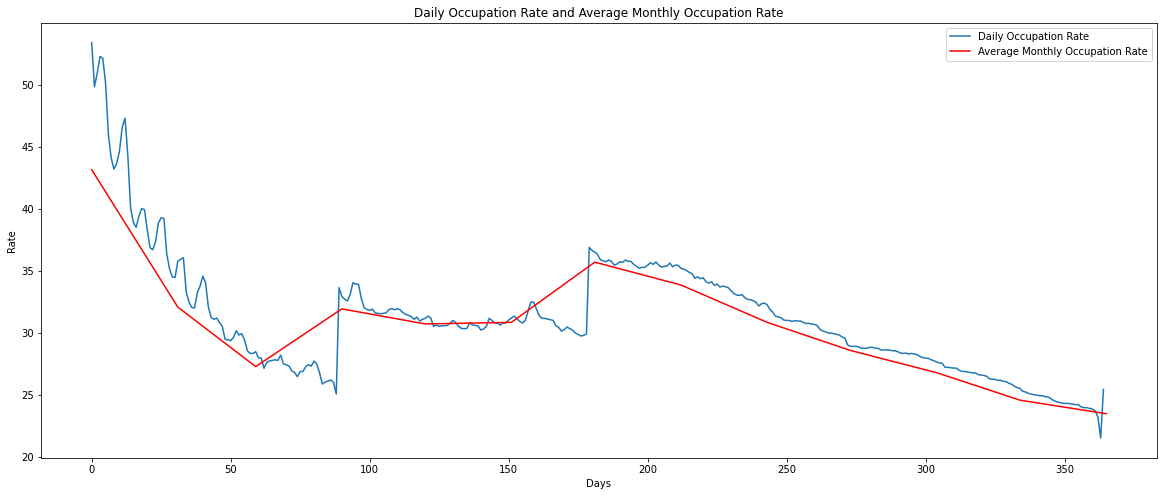

In [43]:
plt.figure(figsize = (20 , 8))
plt.plot(cmtg['Occupation Rate'])
plt.plot(xmonths , monthcmtg['Occupation Rate'] ,'-r')
plt.legend(["Daily Occupation Rate", "Average Monthly Occupation Rate"])
plt.ylabel("Rate")
plt.xlabel("Days")
plt.title("Daily Occupation Rate and Average Monthly Occupation Rate");

## CRISP-DM : Q2

In [44]:
avgprice = newcalendar.groupby(["property_type" , "year" , "month" , "day"]).mean().reset_index()

In [45]:
avgprice

,property_type,year,month,day,listing_id,NumericalPrice,id
0,Apartment,2016,1,4,5750875.05,114.81,5750875.05
1,Apartment,2016,1,5,5750875.05,114.83,5750875.05
2,Apartment,2016,1,6,5750875.05,114.91,5750875.05
3,Apartment,2016,1,7,5750875.05,115.15,5750875.05
4,Apartment,2016,1,8,5750875.05,118.26,5750875.05
...,...,...,...,...,...,...,...
5835,Yurt,2016,12,29,7563243.00,100.00,7563243.00
5836,Yurt,2016,12,30,7563243.00,100.00,7563243.00
5837,Yurt,2016,12,31,7563243.00,100.00,7563243.00
5838,Yurt,2017,1,1,7563243.00,100.00,7563243.00


In [46]:
avgmprice = newcalendar.groupby(["property_type" , "year" , "month"]).mean().reset_index()

In [47]:
avgmprice

,property_type,year,month,listing_id,day,NumericalPrice,id
0,Apartment,2016,1,5750875.05,17.50,117.31,5750875.05
1,Apartment,2016,2,5750875.05,15.00,120.78,5750875.05
2,Apartment,2016,3,5750875.05,16.00,126.74,5750875.05
3,Apartment,2016,4,5750875.05,15.50,130.68,5750875.05
4,Apartment,2016,5,5750875.05,16.00,135.29,5750875.05
...,...,...,...,...,...,...,...
203,Yurt,2016,9,7563243.00,15.50,100.00,7563243.00
204,Yurt,2016,10,7563243.00,16.00,100.00,7563243.00
205,Yurt,2016,11,7563243.00,15.50,100.00,7563243.00
206,Yurt,2016,12,7563243.00,16.00,100.00,7563243.00


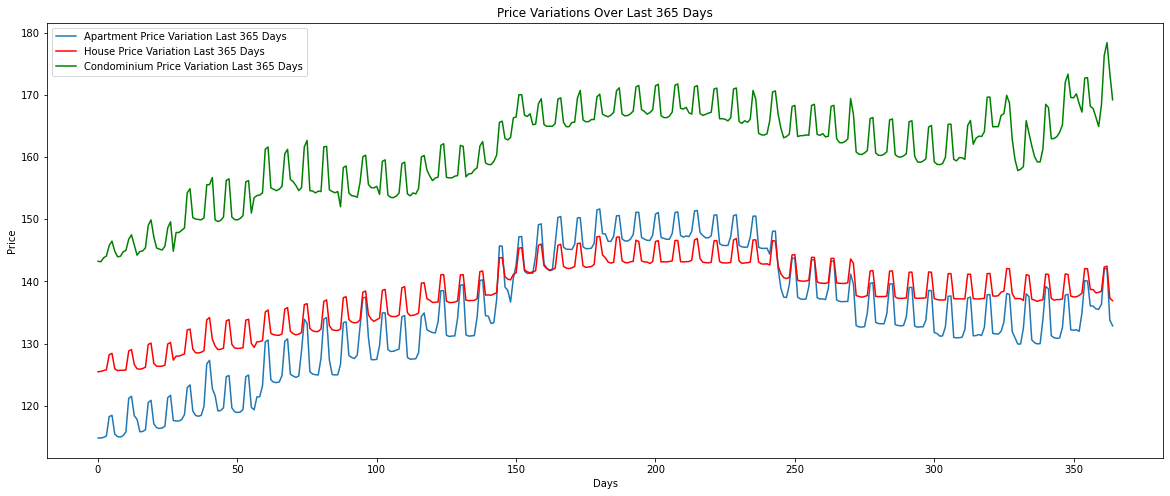

In [48]:
plt.figure(figsize = (20 , 8))
plt.plot(avgprice[(avgprice['property_type'] == "Apartment")]['NumericalPrice'])
plt.plot(np.arange(365) , avgprice[(avgprice['property_type'] == "House")]['NumericalPrice'] , "r")
plt.plot(np.arange(365) , avgprice[(avgprice['property_type'] == "Condominium")]['NumericalPrice'] , "g")
plt.legend(["Apartment Price Variation Last 365 Days" , "House Price Variation Last 365 Days" , "Condominium Price Variation Last 365 Days" ])
plt.ylabel("Price")
plt.xlabel("Days")
plt.title("Price Variations Over Last 365 Days");

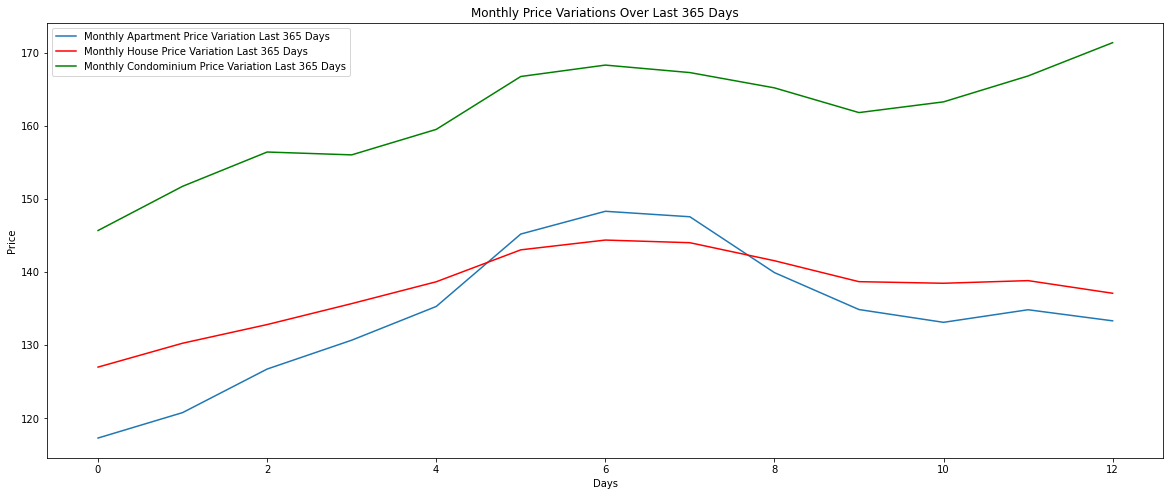

In [49]:
plt.figure(figsize = (20 , 8))
plt.plot(avgmprice[(avgmprice['property_type'] == "Apartment")]['NumericalPrice'])
plt.plot(np.arange(13) , avgmprice[(avgmprice['property_type'] == "House")]['NumericalPrice'] , "r")
plt.plot(np.arange(13) , avgmprice[(avgmprice['property_type'] == "Condominium")]['NumericalPrice'] , "g")
plt.legend(["Monthly Apartment Price Variation Last 365 Days" , "Monthly House Price Variation Last 365 Days" , "Monthly Condominium Price Variation Last 365 Days" ])
plt.ylabel("Price")
plt.xlabel("Days")
plt.title("Monthly Price Variations Over Last 365 Days");

## CRISP-DM : Q3

In [53]:
listinginfo.rename(columns = {'neighbourhood' : 'neighborhood'} , inplace = True)

C:\Users\marce\anaconda3\envs\dsenv\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [54]:
percentage = pd.DataFrame(listinginfo.groupby("neighborhood").size().sort_values(ascending = False)/listinginfo.groupby("neighborhood").size().sort_values(ascending = False).sum() * 100 , columns = ["Percentage"])

In [55]:
percentage[:20].reset_index()

,neighborhood,Percentage
0,Capitol Hill,10.32
1,Ballard,6.26
2,Belltown,6.00
3,Minor,5.64
4,Queen Anne,5.50
5,Fremont,4.35
6,Wallingford,4.20
7,University District,3.15
8,First Hill,3.09
9,Stevens,2.88


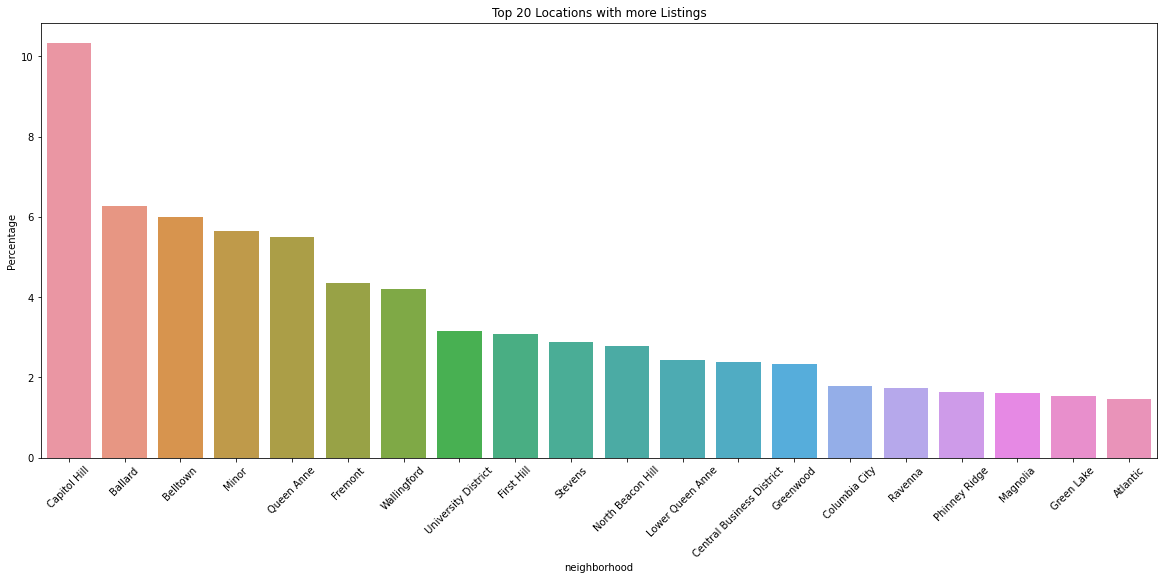

In [56]:
plt.figure(figsize = (20,8))
plt.title("Top 20 Locations with more Listings");
plt.tick_params(axis='x', labelrotation=45);
sns.barplot(x="neighborhood", y="Percentage", data=percentage[:20].reset_index());

In [57]:
pcalendar = newcalendar.copy()
pcalendar = pd.merge(pcalendar , listinginfo[['id' , 'neighborhood']] ).dropna()
available2 = pd.DataFrame(pcalendar.groupby(["neighborhood" , "year" , "month" ,"day", "available"]).size())

In [67]:
neighborhood = ['Capitol Hill', 'Ballard', 'Belltown', 'Minor', 'Queen Anne','Fremont']

In [68]:
available2.loc["Capitol Hill"]

0
year month day available     
2016 1     4   f          201
               t          138
           5   f          195
               t          144
           6   f          202
...                       ...
     12    31  t          256
2017 1     1   f           62
               t          277
           2   f           71
               t          268

[730 rows x 1 columns]

In [69]:
cmtg = []
for j in neighbourhood:
    data = available2.loc[j]
    for row in days.itertuples():
        t = data.loc[row.year].loc[row.month].loc[row.day].loc['t'][0]
        f = data.loc[row.year].loc[row.month].loc[row.day].loc['f'][0]
        rate = np.round(f / (f+t) * 100,2)
        d = {
            'Neighborhood' : j ,
            'Year' : row.year ,
            "Month" : row.month,
            "Day" : row.day,
            'Available' : t ,
            'Booked' : f ,
            'Occupation Rate' : rate
        }
        cmtg.append(d)

In [70]:
nrate = pd.DataFrame(cmtg)

In [71]:
monthnrate = nrate.groupby(["Neighborhood","Year" , "Month"]).mean()

In [72]:
monthnrate.reset_index(inplace = True)

In [73]:
m1 = monthnrate[(monthnrate['Year'] == 2016) & (monthnrate['Month'] == 1)]
m6 = monthnrate[(monthnrate['Year'] == 2016) & (monthnrate['Month'] == 6)]
m12 = monthnrate[(monthnrate['Year'] == 2016) & (monthnrate['Month'] == 12)]
anualanalysis = pd.concat([m1 , m6 , m12])

In [74]:
anualanalysis.set_index(['Neighborhood' , 'Month'] , inplace = True)

## Calculating Variation

In [75]:
neighborhood

['Capitol Hill', 'Ballard', 'Belltown', 'Minor', 'Queen Anne', 'Fremont']

In [76]:
anualanalysis

,,Year,Day,Available,Booked,Occupation Rate
Neighborhood,Month,,,,,
Ballard,1,2016,17.50,111.46,99.54,47.17
Belltown,1,2016,17.50,123.68,74.32,37.54
Capitol Hill,1,2016,17.50,173.18,165.82,48.91
Fremont,1,2016,17.50,77.21,67.79,46.75
Minor,1,2016,17.50,107.14,78.86,42.40
Queen Anne,1,2016,17.50,91.75,93.25,50.41
Ballard,6,2016,15.50,154.83,56.17,26.62
Belltown,6,2016,15.50,131.27,66.73,33.70
Capitol Hill,6,2016,15.50,210.90,128.10,37.79


In [77]:
months = [12 , 6 , 1]
nvar = []
for i in neighborhood:
    m12 = anualanalysis.loc[i].loc[12]['Occupation Rate']
    m6 = anualanalysis.loc[i].loc[6]['Occupation Rate']
    m1 = anualanalysis.loc[i].loc[1]['Occupation Rate']
    d = {
        'Neighborhood' : i ,
        'First Semester Variation' : np.round((m6-m1)/m1 * 100 , 2 ) ,
        'Second Semester Variation' : np.round((m12-m6)/m6 * 100 , 2 )  ,
        'Anual Variation' : np.round((m12-m1)/m1 * 100 , 2 )  ,
    }
    nvar.append(d)

In [78]:
nvar = pd.DataFrame(nvar)

In [79]:
nvar

,Neighborhood,First Semester Variation,Second Semester Variation,Anual Variation
0,Capitol Hill,-22.75,-33.04,-48.27
1,Ballard,-43.57,-16.67,-52.98
2,Belltown,-10.21,16.16,4.29
3,Minor,-33.76,-33.61,-56.02
4,Queen Anne,-24.50,-38.11,-53.27
5,Fremont,-28.85,-30.63,-50.65
